Gaussian Naive Bayes - CV Accuracy: 78.93%
Multinomial Naive Bayes - CV Accuracy: 79.10%
Gaussian Naive Bayes - Test Accuracy: 78.43%
Multinomial Naive Bayes - Test Accuracy: 79.08%
Confusion Matrix for Gaussian Naive Bayes:
[[6426  347]
 [1604  668]]
Confusion Matrix for Multinomial Naive Bayes:
[[5454 1319]
 [ 573 1699]]


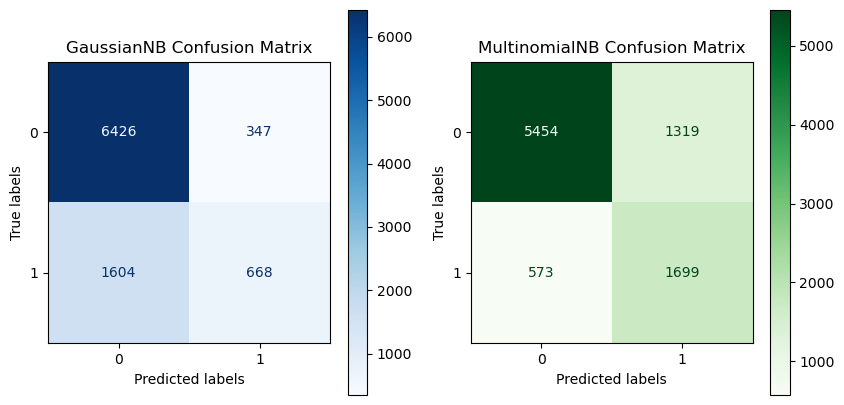

[0 0 0 ... 0 0 0]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for advanced visualization
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

# Load the dataset
file_path = 'adult.csv'  # Specify the correct file path
data = pd.read_csv(file_path)

# Replace '?' with NaN and drop rows with any null values
data.replace('?', pd.NA, inplace=True)
cleaned_data = data.dropna()

# Drop the 'fnlwgt' column as it may not be relevant for the prediction
final_data = cleaned_data.drop(columns=['fnlwgt'])

# Split the data into features and target
target = (final_data['income'] == '>50K').astype(int)
features_data = final_data.drop(columns=['income'])

# Encoding categorical variables
categorical_cols = features_data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(features_data[categorical_cols])

# Standardize numerical variables
numerical_cols = features_data.select_dtypes(include=['int64']).columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(features_data[numerical_cols])

# Create a complete feature matrix by combining categorical and numerical data
features = np.hstack((encoded_categorical_data, scaled_numerical_data))

# Split the data into train (60%), validation (20%), and test (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=125)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=125)  # 0.25 x 0.8 = 0.2

# Initialize the classifiers
gnb = GaussianNB()
mnb = MultinomialNB()

# Cross-validation
gnb_cv_scores = cross_val_score(gnb, scaled_numerical_data, target, cv=4, scoring='accuracy')
mnb_cv_scores = cross_val_score(mnb, encoded_categorical_data, target, cv=4, scoring='accuracy')

# Fitting the models on the training data
gnb.fit(X_train[:, -len(numerical_cols):], y_train)
mnb.fit(X_train[:, :-len(numerical_cols)], y_train)

# Evaluating the models on the test set
gnb_predictions = gnb.predict(X_test[:, -len(numerical_cols):])
mnb_predictions = mnb.predict(X_test[:, :-len(numerical_cols)])
gnb_test_accuracy = accuracy_score(y_test, gnb_predictions)
mnb_test_accuracy = accuracy_score(y_test, mnb_predictions)

# Output results
print("Gaussian Naive Bayes - CV Accuracy: {:.2f}%".format(gnb_cv_scores.mean() * 100))
print("Multinomial Naive Bayes - CV Accuracy: {:.2f}%".format(mnb_cv_scores.mean() * 100))
print("Gaussian Naive Bayes - Test Accuracy: {:.2f}%".format(gnb_test_accuracy * 100))
print("Multinomial Naive Bayes - Test Accuracy: {:.2f}%".format(mnb_test_accuracy * 100))

# Generate and print confusion matrices
cm_gnb = confusion_matrix(y_test, gnb_predictions)
cm_mnb = confusion_matrix(y_test, mnb_predictions)
print("Confusion Matrix for Gaussian Naive Bayes:")
print(cm_gnb)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(cm_mnb)

# Plotting confusion matrices with numerals
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# sns.heatmap(cm_gnb, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax[0])
ConfusionMatrixDisplay.from_predictions(y_test, gnb_predictions, ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('GaussianNB Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
# sns.heatmap(cm_mnb, annot=True, fmt="d", cmap=plt.cm.Greens, ax=ax[1])
ConfusionMatrixDisplay.from_predictions(y_test, mnb_predictions, ax=ax[1], cmap=plt.cm.Greens)
ax[1].set_title('MultinomialNB Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
plt.show()
